In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

In [3]:
dataset = pd.read_csv("D:/Machine Learning/Datasets/Cyber/archive (5)/cyberbullying_tweets.csv",skipinitialspace=True)

In [4]:
dataframe=pd.DataFrame(dataset)

In [5]:
dataframe

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [6]:
unique_cyberbullying_type=dataframe["cyberbullying_type"].unique()
unique_cyberbullying_type_values=unique_cyberbullying_type.tolist()
unique_cyberbullying_type_values

['not_cyberbullying',
 'gender',
 'religion',
 'other_cyberbullying',
 'age',
 'ethnicity']

In [7]:
#encoding labels
counter=0
for i in unique_cyberbullying_type_values:
    dataframe=dataframe.replace(i,counter)
    counter=counter+1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21520\2694405521.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe=dataframe.replace(i,counter)


In [ ]:
dataframe

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 47692):
  review = re.sub('[^a-zA-Z]', ' ', dataframe['tweet_text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
type(corpus)
df=pd.DataFrame(corpus)
df

,0
0,word katandandr food crapilici mkr
1,aussietv white mkr theblock imacelebrityau tod...
2,xochitlsuckkk classi whore red velvet cupcak
3,jason gio meh p thank head not concern anoth a...
4,rudhoeenglish isi account pretend kurdish acco...
...,...
47687,black ppl expect anyth depend anyth yet free p...
47688,turner not withhold disappoint turner call cou...
47689,swear god dumb nigger bitch got bleach hair re...
47690,yea fuck rt therealexel your nigger fuck unfol...


In [10]:
len(corpus)

47692

In [11]:
#Creating Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = df[0]
y = dataframe.loc[:,"cyberbullying_type"].values

In [12]:
print(X)
print(X.shape)

0                       word katandandr food crapilici mkr
1        aussietv white mkr theblock imacelebrityau tod...
2             xochitlsuckkk classi whore red velvet cupcak
3        jason gio meh p thank head not concern anoth a...
4        rudhoeenglish isi account pretend kurdish acco...
                               ...                        
47687    black ppl expect anyth depend anyth yet free p...
47688    turner not withhold disappoint turner call cou...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt therealexel your nigger fuck unfol...
47691    bro u gotta chill rt chillshrammi dog fuck kp ...
Name: 0, Length: 47692, dtype: object
(47692,)


In [13]:
y.shape

(47692,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(38153,) (38153,) (9539,) (9539,)


In [16]:
cv_train  = cv.fit_transform(X_train).toarray()
cv_test = cv.transform(X_test).toarray()

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = XGBClassifier(n_estimators=10, max_depth=2, learning_rate=1, objective='binary:logistic')
classifier.fit(cv_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
y_pred = classifier.predict(cv_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 567   25   40  924   15    1]
 [ 107 1297    1  220    1    0]
 [  23    8 1513   93    0    1]
 [ 105   35    3 1368    8    0]
 [  18    0    0   19 1520    0]
 [   6    3    4   36    0 1578]]


0.8222035852814761

<Axes: >

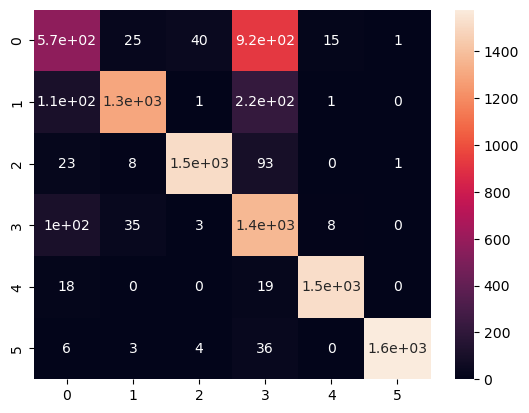

In [20]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [27]:
comment=input("Enter a string to be checked for detection :")

Enter a string to be checked for detection : Tlaib gets emotional as Omar calls for Congress to act over Israel travel restrictions:You both need to be removed from Congress! Your hatred for Jews and Christians shows the radical Islam you both support! REMEMBER 911!


In [28]:
print(comment)
lst=[]
lst.append(comment)

Tlaib gets emotional as Omar calls for Congress to act over Israel travel restrictions:You both need to be removed from Congress! Your hatred for Jews and Christians shows the radical Islam you both support! REMEMBER 911!


In [29]:
review_comment = re.sub('[^a-zA-Z]', ' ', lst[0])
review_comment = review_comment.lower()
review_comment = review_comment.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
print(review_comment)
review_comment = [ps.stem(word) for word in review_comment if not word in set(all_stopwords)]
print(review_comment)
review_comment = ' '.join(review_comment)
print(review_comment)

['tlaib', 'gets', 'emotional', 'as', 'omar', 'calls', 'for', 'congress', 'to', 'act', 'over', 'israel', 'travel', 'restrictions', 'you', 'both', 'need', 'to', 'be', 'removed', 'from', 'congress', 'your', 'hatred', 'for', 'jews', 'and', 'christians', 'shows', 'the', 'radical', 'islam', 'you', 'both', 'support', 'remember']
['tlaib', 'get', 'emot', 'omar', 'call', 'congress', 'act', 'israel', 'travel', 'restrict', 'need', 'remov', 'congress', 'hatr', 'jew', 'christian', 'show', 'radic', 'islam', 'support', 'rememb']
tlaib get emot omar call congress act israel travel restrict need remov congress hatr jew christian show radic islam support rememb


In [30]:
review_comment_array=cv.transform([review_comment]).toarray()
print(review_comment_array)
review_comment_array.shape

[[0 0 0 ... 0 0 0]]


(1, 1500)

In [31]:
y_pred_comment=classifier.predict(review_comment_array)

In [32]:
print(unique_cyberbullying_type_values[y_pred_comment[0]])

religion
